# Text Classifier on Good Read Reviews

In [1]:
import pandas as pd
import numpy as np

In [2]:
 good_reads = pd.read_csv('goodreads.tsv' , sep='\t') #names=['user_id','song_id','play_count'])

In [3]:
good_reads.head()

,title,date,rating,body
0,The Body: A Guide for Occupants,"Oct 11, 2019",5.0,Lovingly presented with humour and kindness an...
1,Resistance Reborn,"Feb 28, 2020",4.0,I read through this book quicker than anticip...
2,The Book of Two Ways,"Jul 13, 2020",4.0,Jodi Picoult does it again in this new novel. ...
3,How to Write One Song: Loving the Things We Cr...,"Feb 21, 2021",4.0,I’m a music freak without a shred of musical a...
4,The Giver of Stars,"Sep 08, 2020",4.0,The Giver of Stars by Jojo Moyes won the Book ...


In [5]:
good_reads.shape

(8433, 4)

In [4]:
#Checking For Null Values
good_reads.isnull().sum()

title       0
date        4
rating    290
body        4
dtype: int64

In [6]:
#Dropping Null Values
good_reads=good_reads.dropna()

In [7]:
good_reads.shape

(8139, 4)

In [8]:
#Chaning review data of every row into string type
for i in range(0,len(good_reads)-1):
    if type(good_reads.iloc[i]['body']) != str:
        good_reads.iloc[i]['body'] = str(good_reads.iloc[i]['body'])

In [9]:
#function to represent sentiment -1(negetive);0(neutral);1(positive)
def sentiment(n):
    return 1 if n>=4 else (-1 if n<=2 else 0)

In [16]:
#Applying Sentiment Function to our Data Frame
good_reads['sentiment'] = good_reads['rating'].apply(sentiment)

In [18]:
good_reads.tail()

,title,date,rating,body,sentiment
8428,The Giver of Stars,"Feb 12, 2020",5.0,I loved this book! Let me start by saying that...,1
8429,Minor Feelings: An Asian American Reckoning,"May 21, 2020",4.0,What did i just read?I chose this title becaus...,1
8430,Trixie and Katya's Guide to Modern Womanhood,"Oct 29, 2020",4.0,**3.45 stars ( if we were using a 10/10 scale ...,1
8431,To Wake the Giant: A Novel of Pearl Harbor,"May 22, 2020",4.0,"Thanks to Netgalley, Random House and Ballenti...",1
8432,Finding Ashley,"Apr 14, 2021",4.0,Finding Ashley starts with Melissa working har...,1


In [19]:
#Combineing features of Name and Body :

def combined_features(row):
    return row['title'] + ' '+ row['body']

In [21]:
good_reads['reviews'] = good_reads.apply(combined_features, axis=1)

In [22]:
good_reads.head()

,title,date,rating,body,sentiment,reviews
0,The Body: A Guide for Occupants,"Oct 11, 2019",5.0,Lovingly presented with humour and kindness an...,1,The Body: A Guide for Occupants Lovingly prese...
1,Resistance Reborn,"Feb 28, 2020",4.0,I read through this book quicker than anticip...,1,Resistance Reborn I read through this book qu...
2,The Book of Two Ways,"Jul 13, 2020",4.0,Jodi Picoult does it again in this new novel. ...,1,The Book of Two Ways Jodi Picoult does it agai...
3,How to Write One Song: Loving the Things We Cr...,"Feb 21, 2021",4.0,I’m a music freak without a shred of musical a...,1,How to Write One Song: Loving the Things We Cr...
4,The Giver of Stars,"Sep 08, 2020",4.0,The Giver of Stars by Jojo Moyes won the Book ...,1,The Giver of Stars The Giver of Stars by Jojo ...


In [24]:
#Spiliting Target and Features
X = good_reads['reviews']
y = good_reads['sentiment']

In [25]:
#Spilting Test and Train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [23]:
# Applyling some pre-processing on the given text.
import re


def clean_text(text):
    """
    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [26]:
#Using CountVectorizer to create bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",preprocessor=clean_text)

In [27]:
#Fitting Data into Count Vectorizer
X_train_CV = vectorizer.fit_transform(X_train)
X_test_CV = vectorizer.transform(X_test)

In [37]:
X_train_CV

<6511x28838 sparse matrix of type '<class 'numpy.int64'>'
	with 411680 stored elements in Compressed Sparse Row format>

In [28]:
#Fitting Classifier Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_CV, y_train)

MultinomialNB()

In [29]:
#Predicting on X_test
y_pred  =  model.predict(X_test_CV)

In [33]:
y_pred 

array([ 1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [45]:
#Classification Report
print('Classification Report :\n')
print(cr)

Classification Report :

              precision    recall  f1-score   support

          -1       0.50      0.31      0.39       197
           0       0.35      0.20      0.26       277
           1       0.80      0.93      0.86      1154

    accuracy                           0.73      1628
   macro avg       0.55      0.48      0.50      1628
weighted avg       0.69      0.73      0.70      1628



In [46]:
import seaborn as sn
import matplotlib.pyplot as plt

In [48]:
categories = [-1,0,1]

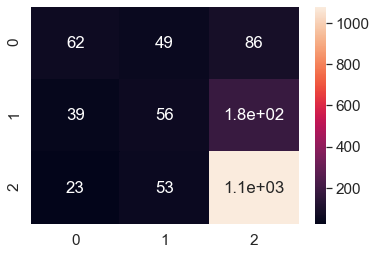

In [54]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True) # font size

plt.show()

In [31]:
cm

array([[  62,   49,   86],
       [  39,   56,  182],
       [  23,   53, 1078]], dtype=int64)

In [40]:
print('Accuracy of our Model is : ',ac*100)

Accuracy of our Model is :  73.46437346437347


In [ ]:
#Can Be Improved by using deep learning techniques